<a href="https://colab.research.google.com/github/bigirimanainnocent12/Regresion_lineaire/blob/main/CODE_RAPPORT_DE_STAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd

try:
    latence= pd.read_excel('/content/Phase latence.xlsx')
    display(latence.head())
except FileNotFoundError:
    print("Error: 'example.xlsx' not found. Please ensure the file exists in the current directory.")
    latence = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    latence = None

,Fermenteur,debut_experience,Souche,Operateur,Milieu,Temps,T°C,Csg T,Poids,Volume,CO2,FinPhas,Vinst,Csg V,V11,V5,Acc G,Tps inject.,Code
0,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.00,18,18,1686.72,1.0,0.42,inf,0.12,inf,0.053,0.060,0.004,0,10 01/10/2020 09:59:00
1,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.33,18,18,1686.70,1.0,0.44,inf,0.06,inf,0.054,0.078,0.004,0,10 01/10/2020 09:59:00
2,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.67,18,18,1686.70,1.0,0.44,inf,0.00,inf,0.052,0.066,0.004,0,10 01/10/2020 09:59:00
3,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,30.00,18,18,1686.64,1.0,0.50,inf,0.18,inf,0.059,0.078,0.004,0,10 01/10/2020 09:59:00
4,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,30.33,18,18,1686.62,1.0,0.52,inf,0.06,inf,0.063,0.078,0.005,0,10 01/10/2020 09:59:00


In [84]:
import numpy as np

# Drop columns with a single unique value
for col in ['Fermenteur', 'Tps inject.']:
    if col in latence.columns:
        latence.drop(columns=col, inplace=True)

# Replace infinite values with NaN
for col in ['FinPhas', 'Csg V']:
    if col in latence.columns:
        latence[col] = latence[col].replace([np.inf, -np.inf], np.nan)

# Remove columns with a high percentage of missing values (e.g., >90%)
threshold = 0.9
for col in latence.columns:
  if latence[col].isnull().sum() / len(latence) > threshold:
    latence.drop(columns=col, inplace=True)


# Convert discretized numerical features to categorical (example with 'Volume' as it's likely discretized)
for col in ['T°C', 'Csg T', 'Volume']:
    if col in latence.columns:
        if latence[col].nunique() < 10: # Consider a column discretized if it has less than 10 unique values. Adjust as needed.
            latence[col] = latence[col].astype('category')

display(latence.head())


,debut_experience,Souche,Operateur,Milieu,Temps,T°C,Csg T,Poids,Volume,CO2,Vinst,V11,V5,Acc G,Code
0,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.00,18,18,1686.72,1.0,0.42,0.12,0.053,0.060,0.004,10 01/10/2020 09:59:00
1,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.33,18,18,1686.70,1.0,0.44,0.06,0.054,0.078,0.004,10 01/10/2020 09:59:00
2,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.67,18,18,1686.70,1.0,0.44,0.00,0.052,0.066,0.004,10 01/10/2020 09:59:00
3,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,30.00,18,18,1686.64,1.0,0.50,0.18,0.059,0.078,0.004,10 01/10/2020 09:59:00
4,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,30.33,18,18,1686.62,1.0,0.52,0.06,0.063,0.078,0.005,10 01/10/2020 09:59:00


In [85]:
latence.drop(columns=['debut_experience','T°C','Volume','Operateur','Vinst','Acc G','Acc G','Csg T',"V5",'Poids'],inplace=True)

In [86]:
latence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Souche  99 non-null     object 
 1   Milieu  99 non-null     object 
 2   Temps   99 non-null     float64
 3   CO2     99 non-null     float64
 4   V11     99 non-null     float64
 5   Code    99 non-null     object 
dtypes: float64(3), object(3)
memory usage: 4.8+ KB


In [87]:
latence['Souche'].unique()

array(['4010291G', '722 + FO 20+20', 'VRB e2'], dtype=object)

In [88]:
latence.groupby('Souche')['V11'].describe()

,count,mean,std,min,25%,50%,75%,max
Souche,,,,,,,,
4010291G,32.0,0.239531,0.162340,0.052,0.08975,0.210,0.3695,0.535
722 + FO 20+20,30.0,0.300900,0.166808,0.064,0.14100,0.309,0.4420,0.571
VRB e2,37.0,0.215973,0.127662,0.047,0.09400,0.199,0.3130,0.462


In [89]:
latence['Souche'].value_counts()

,count
Souche,
VRB e2,37
4010291G,32
722 + FO 20+20,30


In [90]:
data_latence=latence[latence['Souche']=='VRB e2']
data_latence.head()

,Souche,Milieu,Temps,CO2,V11,Code
62,VRB e2,Chardo PR 16,18.33,0.400,0.047,10 01/06/2017 17:09:00
63,VRB e2,Chardo PR 16,18.67,0.382,0.051,10 01/06/2017 17:09:00
64,VRB e2,Chardo PR 16,19.00,0.418,0.059,10 01/06/2017 17:09:00
65,VRB e2,Chardo PR 16,19.33,0.455,0.066,10 01/06/2017 17:09:00
66,VRB e2,Chardo PR 16,20.00,0.509,0.073,10 01/06/2017 17:09:00


# **Statistique descriptive**

In [91]:
data_latence['V11'].describe()

,V11
count,37.000000
mean,0.215973
std,0.127662
min,0.047000
25%,0.094000
50%,0.199000
75%,0.313000
max,0.462000


# **Nuage des points**

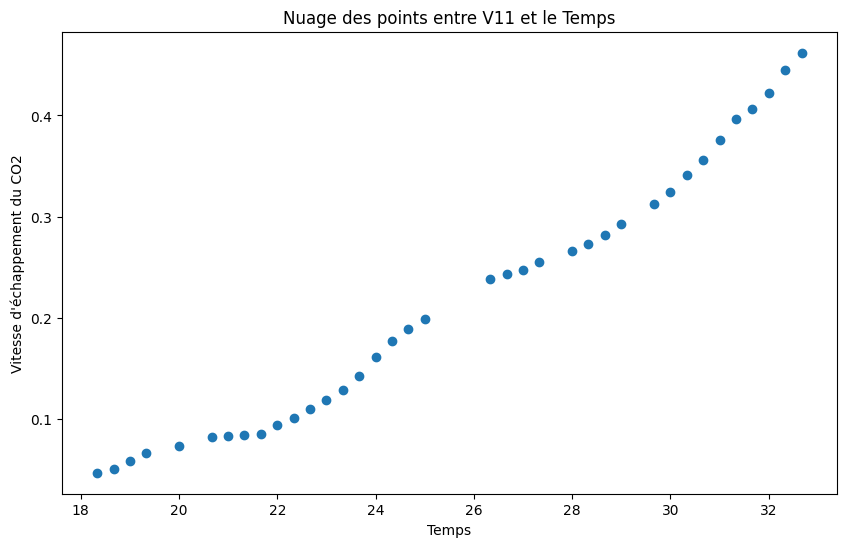

In [92]:
import matplotlib.pyplot as plt
figsize = (10, 6)
plt.figure(figsize=figsize)
plt.scatter(data_latence['Temps'],data_latence['V11'])
plt.xlabel('Temps')
plt.ylabel("Vitesse d'échappement du CO2")
plt.title('Nuage des points entre V11 et le Temps')
plt.show()

# **Régression linéaire entre V11 et Temps**

In [93]:
import statsmodels.formula.api as sm

modele=sm.ols('V11 ~ Temps',data=data_latence).fit()
print(modele.summary())

                            OLS Regression Results                            
Dep. Variable:                    V11   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1330.
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           1.94e-29
Time:                        14:22:09   Log-Likelihood:                 91.941
No. Observations:                  37   AIC:                            -179.9
Df Residuals:                      35   BIC:                            -176.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5124      0.020    -25.289      0.0

# **Test de Shapiro-wilk**

Le test de Shapiro-Wilk est un test statistique utilisé pour évaluer si un échantillon de données
suit une distribution normale. Les hypothèses du test sont les suivantes:

➢ $H_0$ : L’échantillon est issu d’une population normalement distribuée.

➢ $H_1$ : L’échantillon n’est pas issu d’une population normalement distribuée

In [97]:
from scipy import stats
residus=modele.resid
statistic, pvalue=stats.shapiro(residus)
model={
    "Test":["Shapiro-Wilk"],
    "Statistique":[statistic],
    "Valeur p":[pvalue]
}
pd.DataFrame(model)



,Test,Statistique,Valeur p
0,Shapiro-Wilk,0.885283,0.001178


<Figure size 2000x1000 with 0 Axes>

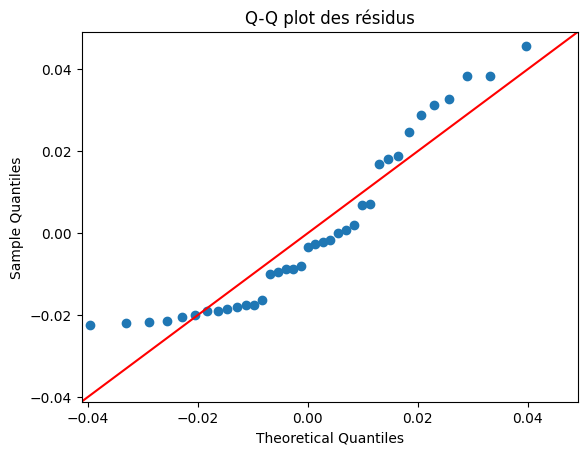

In [98]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
figsize = (20, 10)
plt.figure(figsize=figsize)
sm.qqplot(residus,loc=residus.mean(),scale=residus.std(),line='45')
plt.title('Q-Q plot des résidus')
plt.show()

# **Homoscédasticité des Résidus**

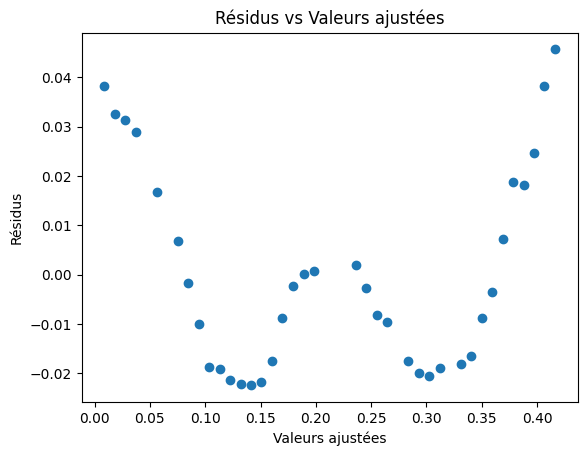

In [99]:
import matplotlib.pyplot as plt
plt.scatter(modele.fittedvalues,modele.resid)
plt.title('Résidus vs Valeurs ajustées')
plt.xlabel('Valeurs ajustées')
plt.ylabel('Résidus')
plt.show()

# *Test de Breusch-Pagan*

Le test de Breusch-Pagan est un test statistique utilisé pour détecter l'hétéroscédasticité dans un modèle de régression linéaire. L'hétéroscédasticité se produit lorsque la variance des erreurs n'est pas constante à travers les valeurs des variables indépendantes, ce qui peut rendre les résultats de la régression peu fiables.

# Hypothèses du Test
$H_0$: Homoscédasticité (les résidus ont une variance constante).

$H_1$: Hétéroscédasticité (les résidus n'ont pas une variance constante).

# Étapes du Test de Breusch-Pagan

* Ajustement du modèle de régression : Ajustez le modèle de régression linéaire initial et obtenez les résidus.

* Calcul des résidus au carré : Calculez les résidus au carré du modèle ajusté.

* Régression auxiliaire : Effectuez une régression des résidus au carré sur les variables indépendantes du modèle initial.

* Calcul de la statistique du test : La statistique du test est calculée comme suit :
$χ^2$=n*$R_{nouveau}^2$

où:
n est le nombre d'observations et $R_{nouveau}^2$ est le coefficient de détermination de la régression auxiliaire.

In [100]:
import pandas as pd
# Test de Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan
# Use all residuals instead of just the head
bp_test = het_breuschpagan(modele.resid, modele.model.exog)
labels = ['Statistique LM', 'p-value', 'Statistique F', 'p-value F']  # Define labels for bp_test results
d = dict(zip(labels, bp_test))
ide = ["Test de Breusch-Pagan"]  # Put the index label in a list
df = pd.DataFrame([d], index=ide)  # Create a DataFrame with a single row
display(df)

,Statistique LM,p-value,Statistique F,p-value F
Test de Breusch-Pagan,0.002595,0.95937,0.002455,0.960763


La statistque du est égalé à 0.002595, Sous $H_O$, cette statistique suit la loi des Khi- deux à 1 dégre de liberté. La pvalue est de 0.95937 qui est largement superieur au seuil de 5%. Donc nous acceptons $H_0$ et nous cocluons que les résidus sont homoscédastique.

# **Equation du modèle**

$Y_i$=0.5124-0.0284*$X_i$+$\epsilon_i$



# **La fin latence**

In [101]:
0.5124/0.0284

18.04225352112676

# **Fin_fermenation**

In [102]:
import pandas as pd

try:
    fermenation= pd.read_excel('/content/FIN FERMENTATIOJN.xlsx')
    display(fermenation.head())
except FileNotFoundError:
    print("Error: 'example.xlsx' not found. Please ensure the file exists in the current directory.")
    fermenation = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    fermenation = None

,Fermenteur,debut_experience,Souche,Operateur,Milieu,Temps,T°C,Csg T,Poids,Volume,CO2,FinPhas,Vinst,Csg V,V11,V5,Acc G,Tps inject.,Code
0,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,240.00,18,18,1603.20,1.0,83.94,inf,0.12,inf,0.164,0.180,-0.004,0,10 01/10/2020 09:59:00
1,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,240.33,18,18,1603.16,1.0,83.98,inf,0.12,inf,0.163,0.156,-0.003,0,10 01/10/2020 09:59:00
2,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,240.67,18,18,1603.10,1.0,84.04,inf,0.18,inf,0.160,0.156,-0.003,0,10 01/10/2020 09:59:00
3,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,241.00,18,18,1603.02,1.0,84.12,inf,0.24,inf,0.166,0.162,-0.002,0,10 01/10/2020 09:59:00
4,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,241.33,18,18,1603.00,1.0,84.14,inf,0.06,inf,0.161,0.162,-0.001,0,10 01/10/2020 09:59:00


In [103]:
import numpy as np

# Drop columns with a single unique value
for col in ['Fermenteur', 'Tps inject.']:
    if col in fermenation.columns:
        fermenation.drop(columns=col, inplace=True)

# Replace infinite values with NaN
for col in ['FinPhas', 'Csg V']:
    if col in fermenation.columns:
        fermenation[col] = fermenation[col].replace([np.inf, -np.inf], np.nan)

# Remove columns with a high percentage of missing values (e.g., >90%)
threshold = 0.9
for col in fermenation.columns:
  if fermenation[col].isnull().sum() / len(fermenation) > threshold:
    fermenation.drop(columns=col, inplace=True)


# Convert discretized numerical features to categorical (example with 'Volume' as it's likely discretized)
for col in ['T°C', 'Csg T', 'Volume']:
    if col in fermenation.columns:
        if fermenation[col].nunique() < 10: # Consider a column discretized if it has less than 10 unique values. Adjust as needed.
            fermenation[col] = fermenation[col].astype('category')

display(fermenation.head())

,debut_experience,Souche,Operateur,Milieu,Temps,T°C,Csg T,Poids,Volume,CO2,Vinst,V11,V5,Acc G,Code
0,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,240.00,18,18,1603.20,1.0,83.94,0.12,0.164,0.180,-0.004,10 01/10/2020 09:59:00
1,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,240.33,18,18,1603.16,1.0,83.98,0.12,0.163,0.156,-0.003,10 01/10/2020 09:59:00
2,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,240.67,18,18,1603.10,1.0,84.04,0.18,0.160,0.156,-0.003,10 01/10/2020 09:59:00
3,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,241.00,18,18,1603.02,1.0,84.12,0.24,0.166,0.162,-0.002,10 01/10/2020 09:59:00
4,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,241.33,18,18,1603.00,1.0,84.14,0.06,0.161,0.162,-0.001,10 01/10/2020 09:59:00


In [104]:
fermenation.drop(columns=['debut_experience','T°C','Volume','Operateur','Vinst','Acc G','Acc G','Csg T',"V5",'Poids'],inplace=True)

In [105]:
fermenation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Souche  692 non-null    object 
 1   Milieu  692 non-null    object 
 2   Temps   692 non-null    float64
 3   CO2     692 non-null    float64
 4   V11     692 non-null    float64
 5   Code    692 non-null    object 
dtypes: float64(3), object(3)
memory usage: 32.6+ KB


In [106]:
fermenation.groupby('Souche')['V11'].describe()

,count,mean,std,min,25%,50%,75%,max
Souche,,,,,,,,
4010291G,216.0,0.096356,0.038605,0.035,0.06075,0.0935,0.129,0.166
722 + FO 20+20,240.0,0.107346,0.028907,0.063,0.08200,0.1030,0.130,0.166
VRB e2,236.0,0.112051,0.026590,0.058,0.08975,0.1135,0.136,0.162


In [107]:
data_fermentation=fermenation[fermenation['Souche']=='VRB e2']
data_fermentation.head()

,Souche,Milieu,Temps,CO2,V11,Code
456,VRB e2,Chardo PR 16,259.00,101.198,0.154,10 01/06/2017 17:09:00
457,VRB e2,Chardo PR 16,259.33,101.234,0.155,10 01/06/2017 17:09:00
458,VRB e2,Chardo PR 16,259.67,101.290,0.152,10 01/06/2017 17:09:00
459,VRB e2,Chardo PR 16,260.67,101.437,0.158,10 01/06/2017 17:09:00
460,VRB e2,Chardo PR 16,261.00,101.474,0.155,10 01/06/2017 17:09:00


In [108]:
data_fermentation['V11'].describe()

,V11
count,236.000000
mean,0.112051
std,0.026590
min,0.058000
25%,0.089750
50%,0.113500
75%,0.136000
max,0.162000


Nuage des points

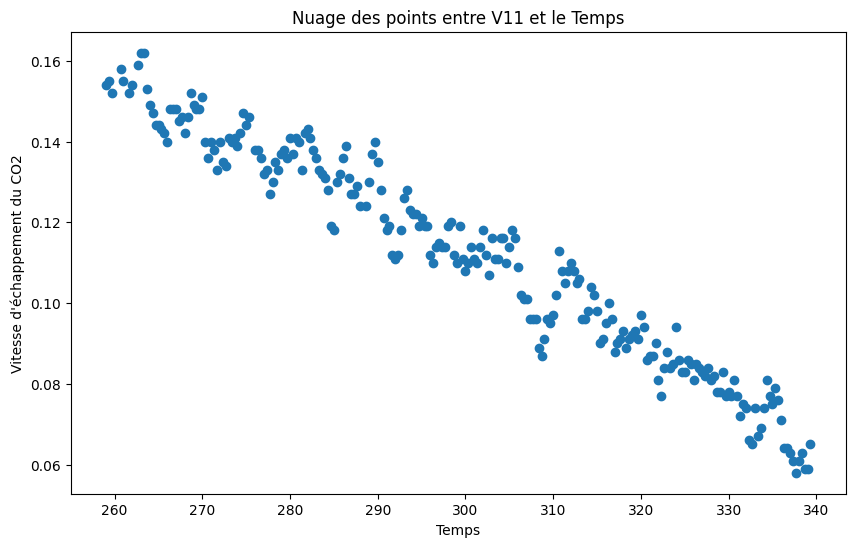

In [109]:
import matplotlib.pyplot as plt
figsize = (10, 6)
plt.figure(figsize=figsize)
plt.scatter(data_fermentation['Temps'],data_fermentation['V11'])
plt.xlabel('Temps')
plt.ylabel("Vitesse d'échappement du CO2")
plt.title('Nuage des points entre V11 et le Temps')
plt.show()

# **Régression linéaire entre V11 et Temps**

In [112]:
import statsmodels.formula.api as sm
modele=sm.ols(data=data_fermentation,formula='V11 ~ Temps').fit()
print(modele.summary())

                            OLS Regression Results                            
Dep. Variable:                    V11   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     4772.
Date:                Thu, 20 Mar 2025   Prob (F-statistic):          1.22e-157
Time:                        14:55:23   Log-Likelihood:                 883.10
No. Observations:                 236   AIC:                            -1762.
Df Residuals:                     234   BIC:                            -1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4503      0.005     91.696      0.0